In [1]:
from arcgishub import hub

In [3]:
myHub = hub.Hub("https://dcdev.maps.arcgis.com", 'mmajumdar_dcdev')

Enter password: ········


In [4]:
vz_init = myHub.initiatives.get('a5becab664564eb18a587efb21dcf23d')

<Item title:"Vision Zero with Collision Lens App Florida" type:Hub Initiative owner:mmajumdar_dcdev>
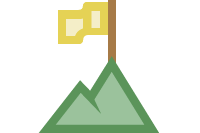

In [5]:
vz_init.item

#### Accessing all indicators for this initiative

In [6]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>]

#### Accessing data for an indicator

In [7]:
boundary = vz_init.indicators.get('boundary')

In [8]:
boundary.url

'https://www25.swfwmd.state.fl.us/arcgis12/rest/services/OpenData/Boundaries/MapServer/4'

In [9]:
boundary.mappings

[{'id': 'name',
  'name': 'COUNTYNAME',
  'alias': 'COUNTYNAME',
  'type': 'esriFieldTypeString'}]

In [10]:
boundary.get_data()

{
  "id": "boundary",
  "name": "boundary",
  "type": "Data",
  "optional": false,
  "definition": {
    "supportedTypes": [
      "FeatureLayer"
    ],
    "geometryTypes": [
      "esriGeometryPolygon"
    ],
    "fields": [
      {
        "name": "name",
        "id": "name",
        "supportedTypes": [
          "esriFieldTypeString"
        ],
        "optional": false
      }
    ]
  },
  "source": {
    "url": "https://www25.swfwmd.state.fl.us/arcgis12/rest/services/OpenData/Boundaries/MapServer/4",
    "layerId": "4",
    "itemId": "3dfca8dbf70b425bb084c7e7f49478ad",
    "name": "Counties_Florida",
    "mappings": [
      {
        "id": "name",
        "name": "COUNTYNAME",
        "alias": "COUNTYNAME",
        "type": "esriFieldTypeString"
      }
    ]
  }
}

#### Adding a new indicator

In [11]:
new_indicator = {"id": "demographics","name": "demographics","type": "Data","optional": False,"definition": {"supportedTypes": ["FeatureLayer"],"geometryTypes": ["esriGeometryPolygon"],"fields": [{"name": "population","id": "population","supportedTypes": ["esriFieldTypeDouble","esriFieldTypeInteger","esriFieldTypeSmallInteger","esriFieldTypeSingle"],"optional": False}]}, "source": {"url": "https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/AGOL_Base_2018_Final/FeatureServer/3","layerId": "3","itemId": "72f186389cb849e882b56af7aa1e546b","name": "Popular Demographics in the United States - Zip Code","mappings": [{"id": "population","name": "TOTPOP_CY","alias": "2018 Total Population (Esri)","type": "esriFieldTypeInteger"}]}}

In [12]:
vz_init.indicators.add(new_indicator)

<Indicator id:"demographics" optional:False>

#### Verfying

In [13]:
vz_init = myHub.initiatives.get('a5becab664564eb18a587efb21dcf23d')

In [14]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>,
 <Indicator id:"demographics" optional:False>]

#### Updating the `optional` field of this indiator

In [15]:
new_indicator['optional'] = True

In [17]:
indicator = vz_init.indicators.get('demographics')

In [18]:
indicator.update(new_indicator)

True

#### Verifying

In [19]:
vz_init = myHub.initiatives.get('a5becab664564eb18a587efb21dcf23d')

In [20]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>,
 <Indicator id:"demographics" optional:True>]

#### Deleting this indicator

In [21]:
indicator = vz_init.indicators.get('demographics')

In [22]:
indicator.delete()

True

#### Verifying

In [23]:
vz_init = myHub.initiatives.get('a5becab664564eb18a587efb21dcf23d')

In [24]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>]